In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
import pandas as pd
%matplotlib inline
pi = np.pi

In [2]:
#RUMORE FOTODIODO
rumore=np.asarray([0.006,0.009,0.004])
incertezze=np.asarray([8.058,8.277,8.175,8.149,8.304]) #I del laser
mean = incertezze.mean()
std=incertezze.std()
print(std)



print(mean)

0.08928740112692275
8.1926


# TARATURA LAMINE DI RITARDO

In [3]:
def cos2(theta,A,B,I):
  return I*(np.cos(A*theta+B))**2

def cos4(theta,A,B,I):
  return (I/2)*(1+(np.cos(A*theta+B))**2)

N=0#,1 dipende da come è ruotata la lamina di ritardo

In [4]:
def sigma_ratio(a,b,s_a,s_b):
 return (a/b)*np.sqrt((s_a/a)**2+(s_b/b)**2) #SIGMA_THETA

In [5]:
L2=pd.read_excel('Stokes.xlsx',sheet_name='Lambda2')
L4=pd.read_excel('Stokes.xlsx',sheet_name='Lambda4')
columns2 = L2.columns
columns4 = L4.columns

In [6]:
#theta_2=np.linspace(0,10,10)#
theta_2=L2[columns2[0]]*pi/180
#theta_4=np.linspace(0,10,10)#
theta_4=L4[columns4[0]]*pi/180
Intensity_2=L2[columns2[1]]
Intensity_4=L4[columns4[1]]

In [7]:
sigmay2=np.full((1, len(theta_2)), std)
#np.shape(sigmay)
sigmay2=sigmay2.flatten()

In [8]:
mean2 = Intensity_2.mean()
std2 = Intensity_2.std()
mean2, std2

(2.5935357142857143, 1.4761221840962055)

In [9]:
mean4 = Intensity_4.mean()
std4 = Intensity_4.std()
mean4, std4

(4.115520000000001, 0.9542593166080869)

In [10]:
sigmay4=np.full((1, len(theta_4)), std)
#np.shape(sigmay)
sigmay4=sigmay4.flatten()

----------------------------
A_2 = 2.009 ± 0.008
B_2 = -0.548 ± 0.007
I_2 = 4.339 ± 0.030
theta_0 = 0.273 ± -0.048
----------------------------



Text(0, 0.5, '$\\mathcal{I} [V]$')

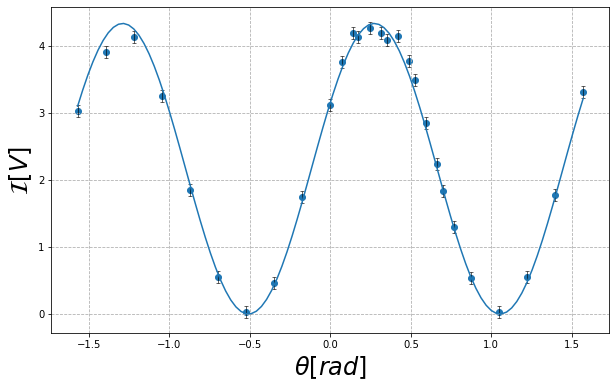

In [11]:
# Fit per la lamina lambda\2
popt,pcov = curve_fit(cos2,theta_2,Intensity_2, sigma=sigmay2 ,bounds=([0.,-3,1],[4.,3,12]))

print('----------------------------')
print(f'A_2 = {popt[0]:.3f} ± {np.sqrt(pcov[0][0]):.3f}')
print(f'B_2 = {popt[1]:.3f} ± {np.sqrt(pcov[1][1]):.3f}')
print(f'I_2 = {popt[2]:.3f} ± {np.sqrt(pcov[2][2]):.3f}')
print(f'theta_0 = {(-popt[1])/popt[0]:.3f} ± {sigma_ratio(popt[0],popt[1],np.sqrt(pcov[0][0]),np.sqrt(pcov[1][1])):.3f}')
print('----------------------------\n')

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(theta_2, Intensity_2, label = 'Dati sperimentali')
ax.errorbar(theta_2, Intensity_2, sigmay2, linestyle="None", color='black', elinewidth=0.6 ,capsize=2,capthick=0.6, zorder=2)
x = np.linspace(theta_2.min(),theta_2.max(), 100)
ax.plot(x, cos2(x,*popt), label = 'Fit')
#ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.), fancybox=True, shadow=True, ncol=1, fontsize=16, facecolor='white')
ax.set_title('', fontsize=15, backgroundcolor='lightyellow', position=(.5, 1.02))
ax.grid(linestyle='--')
ax.set_xlabel('$\\theta[rad]$', fontsize=24)
ax.set_ylabel('$\mathcal{I} [V]$', fontsize=24)


#TOGLIERE PUNTI BRUTTI

In [12]:
#CHISQUARE????

res2 = np.asarray(cos2(theta_2, popt[0], popt[1], popt[2])) - Intensity_2
chisq2 = np.sum((res2/(sigmay2))**2)
nobs2 = len(theta_2) - 3
df2 = nobs2
print("chisq2 =",chisq2,"df2 =",df2)
#print((res2/sigmay2)**2)

chisq2 = 37.741813726568274 df2 = 25


#TABELLA LATEX

sigmatheta=1

print('\\begin{tabular}{|l|r|r|r|r|r|}')
print('\\toprule')
print('\hline')
print('n &      (I_{MAX}','$\pm \sigma$','I_{MAX}) (mV)&  (I_{min}','$\pm \sigma$','I_{min}) (mV)&  (I_{1}','$\pm \sigma$','I_{1}) (mV)& (I_{2}','$\pm \sigma$','I_{2}) (mV) & (d_{2}','$\pm \sigma$','d_{2}) (cm) ','\\\\')
print('\hline')

for i in range(0,Intensity_2.size):
  print(f"{theta_2[i]:.3f}", '\pm',f"{sigmatheta:.3f}", '&',f"{Intensity_2[i]:.3f}", '\pm',f"{sigmay2[i]:.3f}", '\\''\\')
print('\hline')
print('\\bottomrule')
print('\end{tabular}')

----------------------------
A_4 = 1.792 ± 0.045
B_4 = -1.552 ± 0.040
I_4 = 5.301 ± 0.081
zeta_0 = 0.866 ± -0.041
----------------------------



Text(0, 0.5, '$\\mathcal{I} [V]$')

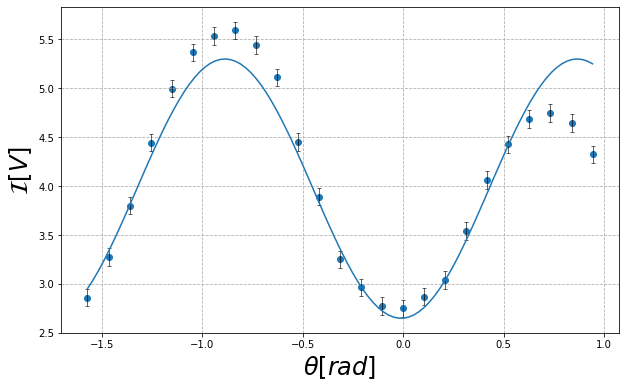

In [13]:
# Fit per la lamina lambda\4
popt,pcov = curve_fit(cos4,theta_4,Intensity_4, sigma=sigmay4, bounds=([0.,-3,1],[4.,3,12]))

print('----------------------------')
print(f'A_4 = {popt[0]:.3f} ± {np.sqrt(pcov[0][0]):.3f}')
print(f'B_4 = {popt[1]:.3f} ± {np.sqrt(pcov[1][1]):.3f}')
print(f'I_4 = {popt[2]:.3f} ± {np.sqrt(pcov[2][2]):.3f}')
print(f'zeta_0 = {-popt[1]/popt[0]:.3f} ± {sigma_ratio(popt[0],popt[1],np.sqrt(pcov[0][0]),np.sqrt(pcov[1][1])):.3f}')
print('----------------------------\n')


fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(theta_4,Intensity_4, label = 'Dati sperimentali')
ax.errorbar(theta_4, Intensity_4, sigmay4, linestyle="None", color='black', elinewidth=0.6 ,capsize=2,capthick=0.6, zorder=2)
x = np.linspace(theta_4.min(),theta_4.max(), 100)
ax.plot(x, cos4(x,*popt), label = 'Fit')
#ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.), fancybox=True, shadow=True, ncol=1, fontsize=16, facecolor='white')
ax.set_title('', fontsize=15, backgroundcolor='lightyellow', position=(.5, 1.02))
ax.grid(linestyle='--')
ax.set_xlabel('$\\theta[rad]$', fontsize=24)
ax.set_ylabel('$\mathcal{I} [V]$', fontsize=24)


#TOGLIERE PUNTI BRUTTI

In [14]:
#CHISQUARE????

res4 = np.asarray(cos4(theta_4, popt[0], popt[1], popt[2])) - Intensity_4
chisq4 = np.sum((res4/(sigmay4))**2)
nobs4 = len(theta_4) - 3
df4 = nobs4
print("chisq2 =",chisq4,"df2 =",df4)
#print((res4/sigmay4)**2)

chisq2 = 266.5278262824562 df2 = 22


# FISSO LAMBDA 4 E RUOTO LAMBDA 2

Text(0, 0.5, '$\\mathcal{I} [V]$')

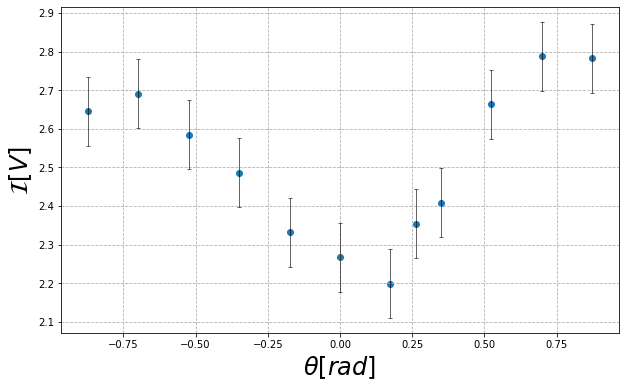

In [15]:
B=pd.read_excel('Stokes.xlsx',sheet_name='PARTE B')
columnsB= B.columns
theta_B=B[columnsB[0]]*pi/180
Intensity_B=B[columnsB[1]]

sigmayB=np.full((1, len(theta_B)), std)
#np.shape(sigmay)
sigmayB=sigmayB.flatten()

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(theta_B, Intensity_B)
ax.errorbar(theta_B, Intensity_B, sigmayB, linestyle="None", color='black', elinewidth=0.6 ,capsize=2,capthick=0.6, zorder=2)
#ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.), fancybox=True, shadow=True, ncol=1, fontsize=16, facecolor='white')
ax.set_title('', fontsize=15, backgroundcolor='lightyellow', position=(.5, 1.02))
ax.grid(linestyle='--')
ax.set_xlabel('$\\theta[rad]$', fontsize=24)
ax.set_ylabel('$\mathcal{I} [V]$', fontsize=24)

# DETERMINAZIONE STATO DI POLARIZZAZIONE DEL LASER

In [16]:
parte2=pd.read_excel('Stokes.xlsx',sheet_name='PBS1')
columnsp2= parte2.columns

Ii=parte2[columnsp2[0]]
Iip=parte2[columnsp2[1]]

sigmaI=np.asarray([std,std,std])

print(Ii)
print(Iip)

Si=(Ii-Iip)/(Ii+Iip)
sigmaSi=(((2*Iip/(Ii+Iip)**2)*sigmaI)**2+((-2*Ii/(Ii+Iip)**2)*sigmaI)**2)**0.5 #PROPAGAZIONE

print(f'S1 = {Si[0]:.3f} ± {sigmaSi[0]:.3f}')
print(f'S2 = {Si[1]:.3f} ± {sigmaSi[1]:.3f}')
print(f'S3 = {Si[2]:.3f} ± {sigmaSi[2]:.3f}')

print((Si[0]**2+Si[1]**2+Si[2]**2)**0.5)

I0=6.256

Si0=(2*Ii-I0)/I0
sigmaSi0=(((2/I0)*sigmaI)**2+((-2*Ii/I0**2)*sigmaI)**2)**0.5

print(f'S1 = {Si0[0]:.3f} ± {sigmaSi0[0]:.3f}')
print(f'S2 = {Si0[1]:.3f} ± {sigmaSi0[1]:.3f}')
print(f'S3 = {Si0[2]:.3f} ± {sigmaSi0[2]:.3f}')

print((Si0[0]**2+Si0[1]**2+Si0[2]**2)**0.5)

0    0.031
1    2.842
2    3.095
Name: Unnamed: 0, dtype: float64
0    5.452
1    2.545
2    2.468
Name: Unnamed: 1, dtype: float64
S1 = -0.989 ± 0.032
S2 = 0.055 ± 0.023
S3 = 0.113 ± 0.023
0.9966220128638205
S1 = -0.990 ± 0.029
S2 = -0.091 ± 0.031
S3 = -0.011 ± 0.032
0.9943582842448591


In [17]:
parte2b=pd.read_excel('Stokes.xlsx',sheet_name='PBS1removed')
columnsp2b= parte2b.columns

Ii=parte2b[columnsp2b[0]]
Iip=parte2b[columnsp2b[1]]

print(Ii)
print(Iip)

Si=(Ii-Iip)/(Ii+Iip)
sigmaSi=(((2*Iip/(Ii+Iip)**2)*sigmaI)**2+((-2*Ii/(Ii+Iip)**2)*sigmaI)**2)**0.5 #PROPAGAZIONE

print(f'S1 = {Si[0]:.3f} ± {sigmaSi[0]:.3f}')
print(f'S2 = {Si[1]:.3f} ± {sigmaSi[1]:.3f}')
print(f'S3 = {Si[2]:.3f} ± {sigmaSi[2]:.3f}')

print((Si[0]**2+Si[1]**2+Si[2]**2)**0.5)


I0=6.256

Si0=(2*Ii-I0)/I0
sigmaSi0=(((2/I0)*sigmaI)**2+((-2*Ii/I0**2)*sigmaI)**2)**0.5

print(f'S1 = {Si0[0]:.3f} ± {sigmaSi0[0]:.3f}')
print(f'S2 = {Si0[1]:.3f} ± {sigmaSi0[1]:.3f}')
print(f'S3 = {Si0[2]:.3f} ± {sigmaSi0[2]:.3f}')


print((Si0[0]**2+Si0[1]**2+Si0[2]**2)**0.5)

0    1.778
1    0.452
2    3.640
Name: Unnamed: 0, dtype: float64
0    5.442
1    5.810
2    3.362
Name: Unnamed: 1, dtype: float64
S1 = -0.507 ± 0.020
S2 = -0.856 ± 0.027
S3 = 0.040 ± 0.018
0.9956035680905047
S1 = -0.432 ± 0.030
S2 = -0.855 ± 0.029
S3 = 0.164 ± 0.033
0.9720783607174215


# PARTE EXTRA

In [18]:
#POLAROID A -112 GRADI QUINDI -22 GRADI DOVE PASSA
#NUOVA TARATURA LAMBDA 2

----------------------------
A_2nt = 2.040 ± 0.043
B_2nt = 1.279 ± 0.094
I_2nt = 3.515 ± 0.057
thetant_0 = -0.627 ± 0.122
----------------------------



Text(0, 0.5, '$\\mathcal{I} [V]$')

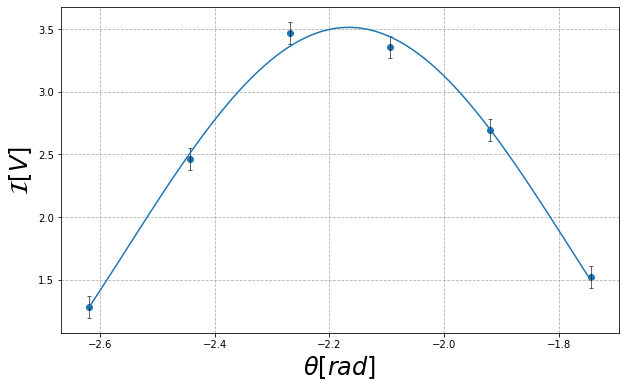

In [19]:
#NUOVA TARATURA LAMBDA 2
#DOVE LA ABBIAMO MESSA PER TARARLA CHE, CHE FUNZIONE USARE??

nt=pd.read_excel('Stokes.xlsx',sheet_name='EXTRAl2')
columnsnt= nt.columns
theta_nt=nt[columnsnt[0]]*pi/180
Intensity_nt=nt[columnsnt[1]]

sigmaynt=np.full((1, len(theta_nt)), std)
#np.shape(sigmay)
sigmaynt=sigmaynt.flatten()


# Fit per la lamina lambda\4
popt,pcov = curve_fit(cos2,theta_nt,Intensity_nt, sigma=sigmaynt, bounds=([0.,-3,1],[4.,3,12]))

print('----------------------------')
print(f'A_2nt = {popt[0]:.3f} ± {np.sqrt(pcov[0][0]):.3f}')
print(f'B_2nt = {popt[1]:.3f} ± {np.sqrt(pcov[1][1]):.3f}')
print(f'I_2nt = {popt[2]:.3f} ± {np.sqrt(pcov[2][2]):.3f}')
print(f'thetant_0 = {-popt[1]/popt[0]:.3f} ± {sigma_ratio(popt[0],popt[1],np.sqrt(pcov[0][0]),np.sqrt(pcov[1][1])):.3f}')
print('----------------------------\n')


fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(theta_nt,Intensity_nt, label = 'Dati sperimentali')
ax.errorbar(theta_nt, Intensity_nt, sigmaynt, linestyle="None", color='black', elinewidth=0.6 ,capsize=2,capthick=0.6, zorder=2)
x = np.linspace(theta_nt.min(),theta_nt.max(), 100)
ax.plot(x, cos2(x,*popt), label = 'Fit')
#ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.), fancybox=True, shadow=True, ncol=1, fontsize=16, facecolor='white')
ax.set_title('', fontsize=15, backgroundcolor='lightyellow', position=(.5, 1.02))
ax.grid(linestyle='--')
ax.set_xlabel('$\\theta[rad]$', fontsize=24)
ax.set_ylabel('$\mathcal{I} [V]$', fontsize=24)


#TOGLIERE PUNTI BRUTTI

In [20]:
#CHISQUARE???? MISTERO???? theta_0??????? non è quello sul grafico

resnt = np.asarray(cos4(theta_nt, popt[0], popt[1], popt[2])) - Intensity_nt
chisqnt = np.sum((resnt/(sigmaynt))**2)
nobsnt = len(theta_nt) - 3
dfnt = nobsnt
print("chisq2 =",chisqnt,"df2 =",dfnt)
#print((resnt/sigmaynt)**2)

chisq2 = 338.75096176453565 df2 = 3


# ROTAZIONE SULLA SFERA DI POINCARE

In [21]:
#https://stackoverflow.com/questions/11140163/plotting-a-3d-cube-a-sphere-and-a-vector-in-matplotlib
parteEXTRA=pd.read_excel('Stokes.xlsx',sheet_name='EXTRAPOIN')
columnsEX= parteEXTRA.columns

I_0extra=4.358

#QUELLI CON I_0 PENSO MENO PRECISI VERIFICARE

In [22]:
# 0gradi


Ii=parteEXTRA[columnsEX[0]]
Iip=parteEXTRA[columnsEX[1]]

print(Ii)
print(Iip)

Si=(Ii-Iip)/(Ii+Iip)

print(Si)

print((Si[0]**2+Si[1]**2+Si[2]**2)**0.5)

Si0=(2*Ii-I_0extra)/I_0extra
#print(Si0)
#print((Si0[0]**2+Si0[1]**2+Si0[2]**2)**0.5)

0    1.741
1    2.845
2    1.306
Name: Unnamed: 0, dtype: float64
0    0.445
1    0.527
2    1.603
Name: 0, dtype: float64
0    0.592864
1    0.687426
2   -0.102097
dtype: float64
0.9134907984911103


In [23]:
#15gradi

Ii=parteEXTRA[columnsEX[2]]
Iip=parteEXTRA[columnsEX[3]]

print(Ii)
print(Iip)

Si=(Ii-Iip)/(Ii+Iip)

print(Si)

print((Si[0]**2+Si[1]**2+Si[2]**2)**0.5)

Si0=(2*Ii-I_0extra)/I_0extra
#print(Si0)
#print((Si0[0]**2+Si0[1]**2+Si0[2]**2)**0.5)

0    1.839
1    1.117
2    1.268
Name: Unnamed: 2, dtype: float64
0    0.109
1    1.867
2    1.545
Name: 15, dtype: float64
0    0.888090
1   -0.251340
2   -0.098471
dtype: float64
0.9282096312502257


In [24]:
#30gradi

Ii=parteEXTRA[columnsEX[4]]
Iip=parteEXTRA[columnsEX[5]]

print(Ii)
print(Iip)

Si=(Ii-Iip)/(Ii+Iip)

print(Si)

print((Si[0]**2+Si[1]**2+Si[2]**2)**0.5)

Si0=(2*Ii-I_0extra)/I_0extra
#print(Si0)
#print((Si0[0]**2+Si0[1]**2+Si0[2]**2)**0.5)

0    1.606
1    0.030
2    1.422
Name: Unnamed: 4, dtype: float64
0    1.334
1    2.687
2    1.475
Name: 30, dtype: float64
0    0.092517
1   -0.977917
2   -0.018295
dtype: float64
0.9824537661830427


In [25]:
#45gradi

Ii=parteEXTRA[columnsEX[6]]
Iip=parteEXTRA[columnsEX[7]]

print(Ii)
print(Iip)

Si=(Ii-Iip)/(Ii+Iip)

print(Si)

print((Si[0]**2+Si[1]**2+Si[2]**2)**0.5)

Si0=(2*Ii-I_0extra)/I_0extra
#print(Si0)
#print((Si0[0]**2+Si0[1]**2+Si0[2]**2)**0.5)

0    1.425
1    0.669
2    1.804
Name: Unnamed: 6, dtype: float64
0    3.057
1    2.306
2    1.576
Name: 45, dtype: float64
0   -0.364123
1   -0.550252
2    0.067456
dtype: float64
0.6632596101571784


In [26]:
#60gradi

Ii=parteEXTRA[columnsEX[8]]
Iip=parteEXTRA[columnsEX[9]]

print(Ii)
print(Iip)

Si=(Ii-Iip)/(Ii+Iip)

print(Si)

print((Si[0]**2+Si[1]**2+Si[2]**2)**0.5)

Si0=(2*Ii-I_0extra)/I_0extra
#print(Si0)
#print((Si0[0]**2+Si0[1]**2+Si0[2]**2)**0.5)

0    1.272
1    2.314
2    1.793
Name: Unnamed: 8, dtype: float64
0    3.267
1    0.841
2    1.559
Name: 60, dtype: float64
0   -0.439524
1    0.466878
2    0.069809
dtype: float64
0.6450037226212229


In [27]:
#75gradi

Ii=parteEXTRA[columnsEX[10]]
Iip=parteEXTRA[columnsEX[11]]

print(Ii)
print(Iip)

Si=(Ii-Iip)/(Ii+Iip)

print(Si)

print((Si[0]**2+Si[1]**2+Si[2]**2)**0.5)

Si0=(2*Ii-I_0extra)/I_0extra
#print(Si0)
#print((Si0[0]**2+Si0[1]**2+Si0[2]**2)**0.5)

0    1.453
1    3.430
2    1.607
Name: Unnamed: 10, dtype: float64
0    2.014
1    0.020
2    1.566
Name: 75, dtype: float64
0   -0.161811
1    0.988406
2    0.012922
dtype: float64
1.0016465959487164


In [28]:
#90gradi

Ii=parteEXTRA[columnsEX[12]]
Iip=parteEXTRA[columnsEX[13]]

print(Ii)
print(Iip)

Si=(Ii-Iip)/(Ii+Iip)

print(Si)

print((Si[0]**2+Si[1]**2+Si[2]**2)**0.5)

Si0=(2*Ii-I_0extra)/I_0extra
#print(Si0)
#print((Si0[0]**2+Si0[1]**2+Si0[2]**2)**0.5)

0    1.721
1    0.772
2    1.378
Name: Unnamed: 12, dtype: float64
0    0.453
1    0.568
2    1.574
Name: 90, dtype: float64
0    0.583257
1    0.152239
2   -0.066396
dtype: float64
0.6064432215992981


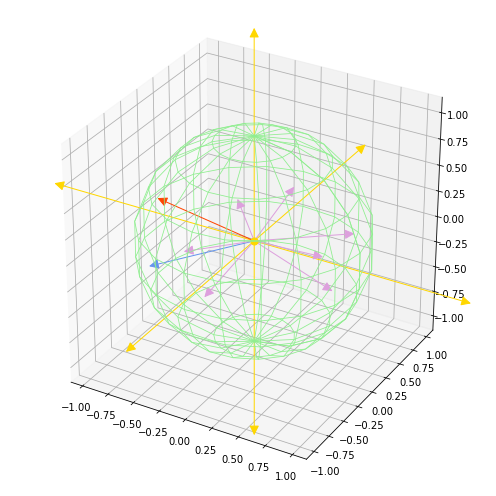

In [29]:
#TOGLIERE TICK E STRUTTURA DIETRO? PLOTTARE VETTORI??

from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations

plt.rcParams["figure.figsize"] = [7.00, 7.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.set_aspect("equal")

# draw cube
#r = [-1, 1]
#for s, e in combinations(np.array(list(product(r, r, r))), 2):
    #if np.sum(np.abs(s-e)) == r[1]-r[0]:
        #ax.plot3D(*zip(s, e), color="b")


# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="lightgreen", lw=0.8)

# draw a point
ax.scatter([0], [0], [0], color="gold", s=50)

# draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

#ASSI       
a = Arrow3D([0, 0], [0, 0], [-2, 2], mutation_scale=20,
            lw=1, arrowstyle="<|-|>", color="gold")
b = Arrow3D([0, 0], [-2, 2], [0, 0], mutation_scale=20,
            lw=1, arrowstyle="<|-|>", color="gold")
c = Arrow3D([-2, 2], [0, 0], [0, 0], mutation_scale=20,
            lw=1, arrowstyle="<|-|>", color="gold")
ax.add_artist(a)
ax.add_artist(b)
ax.add_artist(c)

#PARTE2
PBS1 = Arrow3D([0, -0.989], [0, 0.055], [0, 0.113], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="orangered")
PBS1r = Arrow3D([0, -0.507], [0, -0.856], [0, 0.040], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="cornflowerblue")
ax.add_artist(PBS1)
ax.add_artist(PBS1r)

#EXTRA

E0 = Arrow3D([0, 0.592864], [0, 0.687426], [0, -0.102097], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="plum")
E15 = Arrow3D([0, 0.888090], [0, -0.251340], [0, -0.098471], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="plum")
E30 = Arrow3D([0, 0.092517], [0, -0.977917], [0, -0.018295], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="plum")
E45 = Arrow3D([0, -0.364123], [0, -0.550252], [0, 0.067456], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="plum")
E60 = Arrow3D([0, -0.439524], [0, 0.466878], [0, 0.069809], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="plum")
E75 = Arrow3D([0, -0.161811], [0, 0.988406], [0, 0.012922], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="plum")
E90 = Arrow3D([0, 0.583257], [0, 0.152239], [0, -0.066396], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="plum")

ax.add_artist(E0)
ax.add_artist(E15)
ax.add_artist(E30)
ax.add_artist(E45)
ax.add_artist(E60)
ax.add_artist(E75)
ax.add_artist(E90)



plt.show()

In [30]:
#CAMBIARE SFERA????
#https://stackoverflow.com/questions/32424670/python-matplotlib-drawing-3d-sphere-with-circumferences

# PARTE B

In [31]:
LB=pd.read_excel('Stokes.xlsx',sheet_name='PARTE B')
columnsB = LB.columns

In [32]:
theta_B=LB[columns2[0]]*pi/180
Intensity_B=LB[columnsB[1]]

In [33]:
sigmayB=np.full((1, len(theta_B)), std)
sigmayB=sigmayB.flatten()

In [34]:
meanB = Intensity_B.mean()
stdB = Intensity_B.std()
meanB, stdB

(2.516833333333333, 0.20297910028255411)

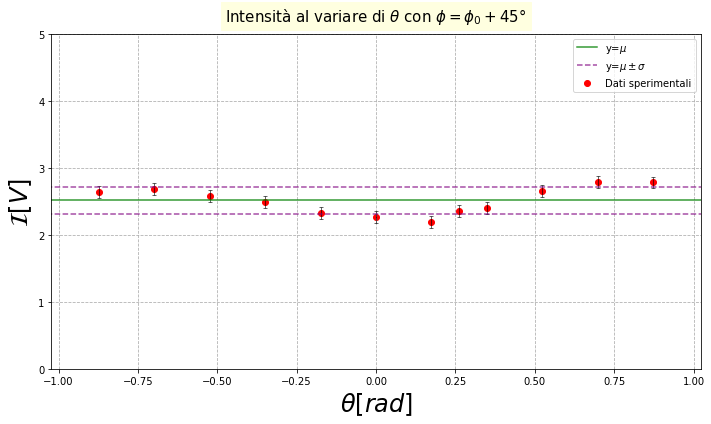

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(theta_B, Intensity_B, label = 'Dati sperimentali', color='red')
ax.errorbar(theta_B, Intensity_B, sigmayB, linestyle="None", color='black', elinewidth=0.6 ,capsize=2,capthick=0.6, zorder=2)
x = np.linspace(theta_B.min() -0.5,theta_B.max() + 0.5, 100)
m = np.ones(100)*meanB
m_pius = np.ones(100)*meanB +stdB
m_mins =np.ones(100)*meanB - stdB
ax.plot(x, m, linestyle='-', color='green', alpha=0.8, label='y=$\mu$')
ax.plot(x, m_pius, linestyle='--', alpha=0.7, color='purple', label='y=$\mu \pm \sigma$')
ax.plot(x, m_mins, linestyle='--', alpha = 0.7, color='purple')
#ax.plot(x, cos2(x,*popt), label = 'Fit')
#ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.), fancybox=True, shadow=True, ncol=1, fontsize=16, facecolor='white')
ax.set_title('Intensità al variare di $\\theta$ con $\phi = \phi_0 + 45°$', fontsize=15, backgroundcolor='lightyellow', position=(.5, 1.02))
ax.grid(linestyle='--')
ax.set_ylim(0,5)
ax.set_xlim(theta_B.min() -0.15,theta_B.max() + 0.15)
ax.set_xlabel('$\\theta[rad]$', fontsize=24)
ax.set_ylabel('$\mathcal{I} [V]$', fontsize=24)
ax.legend()
